In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
# binary assign
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
data = df.values
np.random.seed(42)
np.random.shuffle(data)
split = int(0.8*len(data))
x = data[:, 1:]
y = data[:, 0]
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

print (f"Total samples: {len(data)}")
print (f"Training shape: {len(x_train)}")
print (f"Testing shape: {len(x_test)}")

Total samples: 569
Training shape: 455
Testing shape: 114


In [16]:
# normalization
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

print(f"Normalized train:\n{x_train[:5]}")

Normalized train:
[[-4.55128896e-01 -1.69797301e-01 -4.33241193e-01 -4.87315020e-01
   2.39336592e-01  2.07820444e-02 -1.10129540e-01 -2.67426090e-01
   3.98440618e-01  1.06875847e-01 -1.18858013e-02 -3.34925686e-01
  -1.89334532e-01 -2.43802756e-01 -2.24484362e-02 -3.65500555e-01
  -1.63550711e-01 -2.11197959e-01 -3.36044782e-01 -7.97347878e-02
  -2.56802170e-01 -1.84102235e-01 -3.24599702e-01 -3.51587652e-01
   4.58879885e-01 -1.10731123e-01 -2.76630419e-02 -1.85544420e-01
   1.64457405e-01  1.91522745e-01]
 [ 1.40479714e+00  4.77080786e-01  1.33651393e+00  1.42442348e+00
  -4.46966118e-01 -3.35790443e-02  2.37537751e-01  7.94985023e-01
  -8.20062185e-01 -1.18810478e+00  1.60941135e+00 -7.72131110e-01
   1.51557836e+00  1.60803155e+00 -8.50649402e-01 -5.12450509e-01
  -2.98468091e-01  3.33383461e-01 -8.11748347e-01 -7.85841343e-01
   1.80163238e+00  1.41367508e-01  1.75922866e+00  1.79000799e+00
  -5.74575407e-01 -1.37884756e-01 -2.00353755e-02  9.92654841e-01
  -5.72365632e-01 -1.01

In [17]:
from collections import Counter

class KNN:
    def __init__(self, k=3, metric='euclidean', p=3):
        self.k= k
        self.metric = metric
        self.p = p
        self.x_train = None
        self.y_train = None

    def fit(self,x, y):
        self.x_train = np.array(x)
        self.y_train = np.array(y)

    def predict(self, x_test):
        x_test = np.array(x_test)
        prediction = []
        # calc dist between all train and all test points
        if self.metric == 'euclidean':
            dists = self._calc_euclidean(x_test)
        elif self.metric == 'manhattan':
            dists = self._calc_manhattan(x_test)
        elif self.metric == 'minkowski':
            dists = self._calc_minkowski(x_test)
        elif self.metric == 'cosine':
            dists = self._calc_cosine(x_test)
        elif self.metric == 'hamming':
            dists = self._calc_hamming(x_test)
        else:
            raise ValueError("Unknown metric")

    
        for i in range(len(x_test)):
            # get k nearest labels
            k_indices = np.argsort(dists[i])[:self.k]
            # get labels
            k_labels = [self.y_train[j] for j in k_indices]
            # majority
            common = Counter(k_labels).most_common(1)
            prediction.append(common[0][0])
        return np.array(prediction)
    
    def _calc_euclidean(self, x_test):
        test_sq = np.sum(x_test**2, axis=1).reshape(-1, 1)
        train_sq = np.sum(self.x_train**2, axis=1).reshape(1, -1)
        dot_prod = np.dot(x_test, self.x_train.T)

        return np.sqrt(test_sq + train_sq - 2*dot_prod)

    def _calc_manhattan(self, x_test):
        dists = np.zeros((x_test.shape[0], self.x_train.shape[0]))
        for i in range(x_test.shape[0]):
            dists[i, :] = np.sum(np.abs(self.x_train - x_test[i, :]), axis=1)
        return dists

    def _calc_minkowski(self, x_test):
        dists = np.zeros((x_test.shape[0], self.x_train.shape[0]))
        for i in range(x_test.shape[0]):
            dists[i, :] = np.sum(np.abs(self.x_train - x_test[i, :])**self.p, axis=1)**(1/self.p)
        return dists
    
    def _calc_cosine(self, x_test):
        x_test_norm = x_test / np.linalg.norm(x_test, axis=1, keepdims=True)
        x_train_norm = self.x_train / np.linalg.norm(self.x_train, axis=1, keepdims=True)
        cosine_sim = np.dot(x_test_norm, x_train_norm.T)
        return 1 - cosine_sim  # convert similarity to distance
    
    def _calc_hamming(self, x_test):
        dists = np.zeros((x_test.shape[0], self.x_train.shape[0]))
        for i in range(x_test.shape[0]):
            dists[i, :] = np.sum(self.x_train != x_test[i, :], axis=1)
        return dists
    
    print("KNN class defined.")
    

KNN class defined.


Starting KNN evaluations...
Evaluating metric: euclidean
Metric: euclidean, k: 3, Accuracy: 0.9474
Metric: euclidean, k: 4, Accuracy: 0.9561
Metric: euclidean, k: 9, Accuracy: 0.9298
Metric: euclidean, k: 20, Accuracy: 0.9386
Metric: euclidean, k: 47, Accuracy: 0.9386
Evaluating metric: manhattan
Metric: manhattan, k: 3, Accuracy: 0.9649
Metric: manhattan, k: 4, Accuracy: 0.9649
Metric: manhattan, k: 9, Accuracy: 0.9474
Metric: manhattan, k: 20, Accuracy: 0.9386
Metric: manhattan, k: 47, Accuracy: 0.9386
Evaluating metric: minkowski
Metric: minkowski, k: 3, Accuracy: 0.9474
Metric: minkowski, k: 4, Accuracy: 0.9474
Metric: minkowski, k: 9, Accuracy: 0.9298
Metric: minkowski, k: 20, Accuracy: 0.9386
Metric: minkowski, k: 47, Accuracy: 0.9386
Evaluating metric: cosine
Metric: cosine, k: 3, Accuracy: 0.9649
Metric: cosine, k: 4, Accuracy: 0.9561
Metric: cosine, k: 9, Accuracy: 0.9474
Metric: cosine, k: 20, Accuracy: 0.9561
Metric: cosine, k: 47, Accuracy: 0.9561
Evaluating metric: hamming

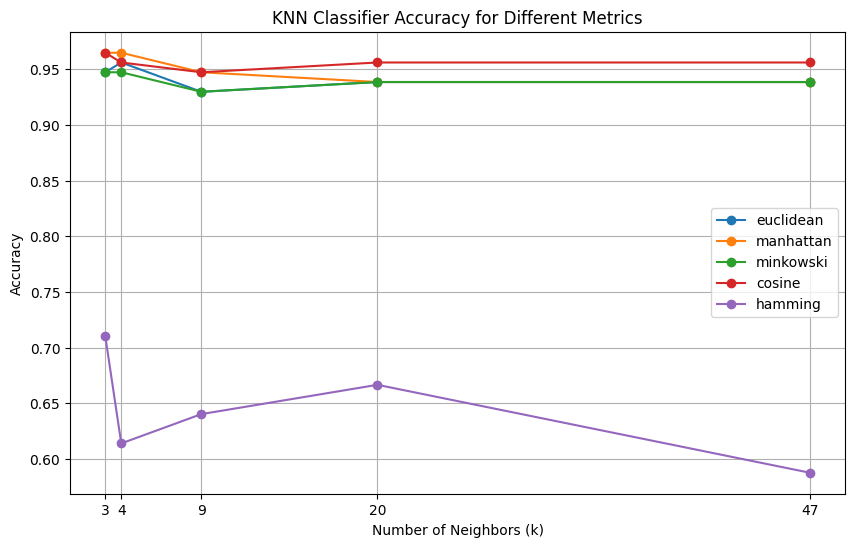

In [18]:
def get_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

k_vals = [3, 4, 9, 20,47]
metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'hamming']
results = {}

print("Starting KNN evaluations...")
for metric in metrics:
    accuracies = []
    print(f"Evaluating metric: {metric}")
    for k in k_vals:
        clf = KNN(k=k, metric=metric)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc = get_accuracy(y_test, y_pred)
        accuracies.append(acc)
        print(f"Metric: {metric}, k: {k}, Accuracy: {acc:.4f}")
    results[metric] = accuracies

print("KNN evaluations completed.")

# plotting

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(k_vals, results[metric], marker='o', label=metric)
plt.title('KNN Classifier Accuracy for Different Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def precision_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return precision, recall

best_acc = 0
best_config = (None, None) # (Metric, K)

# Loop through our stored results to find max accuracy
for metric in results:
    max_acc_for_metric = max(results[metric])
    if max_acc_for_metric > best_acc:
        best_acc = max_acc_for_metric
        # Find which K gave this accuracy
        best_k_index = np.argmax(results[metric])
        best_k = k_vals[best_k_index]
        best_config = (metric, best_k)

print(f"BEST MODEL FOUND:")
print(f"Metric: {best_config[0]}")
print(f"K: {best_config[1]}")
print(f"Accuracy: {best_acc:.4f}")

# 3. Retrain Best Model to get detailed stats
best_knn = KNN(k=best_config[1], metric=best_config[0])
best_knn.fit(x_train, y_train)
final_preds = best_knn.predict(x_test)

# 4. Print Metrics
conf_matrix = confusion_matrix(y_test, final_preds)
precision, recall = precision_recall(y_test, final_preds)

print("\n--- Detailed Metrics ---")
print(f"Confusion Matrix:\n{conf_matrix}")
print("(Format: [[TN, FP], [FN, TP]])")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

BEST MODEL FOUND:
Metric: manhattan
K: 3
Accuracy: 0.9649

--- Detailed Metrics ---
Confusion Matrix:
[[67  0]
 [ 4 43]]
(Format: [[TN, FP], [FN, TP]])
Precision: 1.0000
Recall: 0.9149


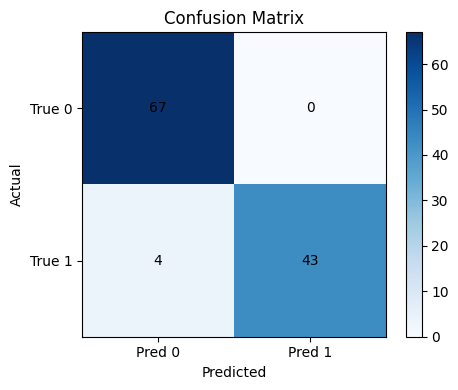

In [21]:
plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Pred 0", "Pred 1"])
plt.yticks([0, 1], ["True 0", "True 1"])

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('knn_comprehensive_report.pdf') as pdf:
    fig = plt.figure(figsize=(16, 12))

    # 1. Distribution of Diagnosis in Dataset
    plt.subplot(3, 3, 1)
    plt.bar(['Benign (0)', 'Malignant (1)'], diagnosis_counts.values, color=['skyblue', 'salmon'])
    plt.title('Distribution of Diagnosis in Dataset')
    plt.ylabel('Count')
    for i, v in enumerate(diagnosis_counts.values):
        plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

    # 2. Accuracy Comparison Across Metrics
    plt.subplot(3, 3, 2)
    for metric in metrics:
        plt.plot(k_vals, results[metric], marker='o', label=metric, linewidth=2)
    plt.title('KNN Accuracy Across Different Metrics')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_vals)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)

    # 3. Best Model Performance Bar Chart
    plt.subplot(3, 3, 3)
    best_metrics = [metric for metric in metrics]
    best_accs = [max(results[metric]) for metric in metrics]
    colors = ['gold' if metric == best_config[0] else 'lightgray' for metric in best_metrics]
    plt.barh(best_metrics, best_accs, color=colors)
    plt.xlabel('Best Accuracy')
    plt.title('Best Accuracy per Metric')
    plt.xlim([0, 1])
    for i, v in enumerate(best_accs):
        plt.text(v + 0.01, i, f'{v:.4f}', va='center')

    # 4. Confusion Matrix Heatmap
    plt.subplot(3, 3, 4)
    plt.imshow(conf_matrix, cmap="RdYlGn", alpha=0.8)
    plt.title(f'Confusion Matrix\n({best_config[0]}, k={best_config[1]})')
    plt.colorbar()
    plt.xticks([0, 1], ["Pred Benign", "Pred Malignant"])
    plt.yticks([0, 1], ["True Benign", "True Malignant"])
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, conf_matrix[i, j], ha="center", va="center", 
                    color="black", fontsize=14, fontweight='bold')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # 5. Performance Metrics Bar Chart
    plt.subplot(3, 3, 5)
    metrics_values = [best_acc, precision, recall, f1_score]
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    bars = plt.bar(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title('Best Model Performance Metrics')
    plt.ylabel('Score')
    plt.ylim([0, 1.1])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

    # 6. K-value Impact (Best Metric)
    plt.subplot(3, 3, 6)
    best_metric_results = results[best_config[0]]
    plt.plot(k_vals, best_metric_results, marker='o', linewidth=2, markersize=8, color='green')
    plt.scatter([best_config[1]], [best_acc], color='red', s=200, zorder=5, 
               label=f'Best: k={best_config[1]}', edgecolors='black', linewidths=2)
    plt.title(f'Impact of K on {best_config[0].capitalize()} Metric')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_vals)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 7. Feature Correlation Heatmap (Top 10 features)
    plt.subplot(3, 3, 7)
    top_features = df.iloc[:, 1:11]
    corr_matrix = top_features.corr()
    plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(label='Correlation')
    plt.title('Feature Correlation (First 10 Features)')
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90, fontsize=7)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=7)

    # 8. Train-Test Split Visualization
    plt.subplot(3, 3, 8)
    split_data = [len(x_train), len(x_test)]
    split_labels = [f'Train\n({len(x_train)})', f'Test\n({len(x_test)})']
    explode = (0.05, 0)
    plt.pie(split_data, labels=split_labels, autopct='%1.1f%%', startangle=90,
           colors=['lightblue', 'lightcoral'], explode=explode)
    plt.title(f'Train-Test Split\n(Total: {len(data)} samples)')

    # 9. Prediction Distribution
    plt.subplot(3, 3, 9)
    pred_counts = np.unique(final_preds, return_counts=True)
    actual_counts = np.unique(y_test, return_counts=True)
    x_pos = np.arange(2)
    width = 0.35
    plt.bar(x_pos - width/2, actual_counts[1], width, label='Actual', color='skyblue')
    plt.bar(x_pos + width/2, pred_counts[1], width, label='Predicted', color='orange')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Test Set: Actual vs Predicted')
    plt.xticks(x_pos, ['Benign (0)', 'Malignant (1)'])
    plt.legend()

    plt.tight_layout()
    pdf.savefig(fig)
    plt.close(fig)

    # Add text report page
    from matplotlib.figure import Figure
    fig_text = Figure(figsize=(8.5, 11))
    ax = fig_text.add_subplot(111)
    ax.axis('off')
    text = f"""
KNN CLASSIFIER - COMPREHENSIVE REPORT

DATASET INFORMATION:
• Total Samples: {len(data)}
• Training Samples: {len(x_train)} ({len(x_train)/len(data)*100:.1f}%)
• Testing Samples: {len(x_test)} ({len(x_test)/len(data)*100:.1f}%)
• Number of Features: {x.shape[1]}
• Benign Cases: {diagnosis_counts[0]} ({diagnosis_counts[0]/len(df)*100:.1f}%)
• Malignant Cases: {diagnosis_counts[1]} ({diagnosis_counts[1]/len(df)*100:.1f}%)

MODEL EVALUATION SUMMARY:
• Metrics Tested: {', '.join(metrics)}
• K Values Tested: {k_vals}
• Total Configurations: {len(metrics) * len(k_vals)}

BEST MODEL CONFIGURATION:
• Distance Metric: {best_config[0].upper()}
• Optimal K: {best_config[1]}
• Test Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)

DETAILED PERFORMANCE METRICS:
• Precision: {precision:.4f} ({precision*100:.2f}%)
• Recall: {recall:.4f} ({recall*100:.2f}%)
• F1-Score: {f1_score:.4f} ({f1_score*100:.2f}%)

CONFUSION MATRIX BREAKDOWN:
• True Negatives (TN): {conf_matrix[0,0]} (Correctly predicted Benign)
• False Positives (FP): {conf_matrix[0,1]} (Benign predicted as Malignant)
• False Negatives (FN): {conf_matrix[1,0]} (Malignant predicted as Benign)
• True Positives (TP): {conf_matrix[1,1]} (Correctly predicted Malignant)

ALL METRICS COMPARISON:
"""
    for metric in metrics:
        best_k_idx = np.argmax(results[metric])
        text += f"• {metric.capitalize():12s}: Best Accuracy = {max(results[metric]):.4f} at k={k_vals[best_k_idx]}\n"
    text += "\nKEY INSIGHTS:\n"
    if precision == 1.0:
        text += "✓ Perfect Precision: No false positives (no benign cases misclassified as malignant)\n"
    if recall > 0.9:
        text += f"✓ High Recall ({recall:.2%}): Model catches most malignant cases\n"
    if best_acc > 0.95:
        text += f"✓ Excellent Accuracy ({best_acc:.2%}): Model performs very well overall\n"
    if conf_matrix[1,0] > 0:
        text += f"⚠ Warning: {conf_matrix[1,0]} malignant case(s) misclassified as benign (critical error)\n"
    text += "\nReport generated successfully!\nVisualization included.\n"
    ax.text(0, 1, text, va='top', ha='left', fontsize=12, family='monospace')
    pdf.savefig(fig_text)
    plt.close(fig_text)
